In [2]:
# Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [16]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)


#### Input data

In [3]:
path = "./data/"
file = os.path.join(path, "heart_attack_prediction_indonesia.csv")
df = pd.read_csv(file)

#### Exploratory Data Analysis (EDA)

1. Overview Dataset
Tujuan: memahami struktur dasar dataset (jawab rumusan masalah 1)

EDA yang dilakukan:
- Jumlah baris & kolom
- Tipe data
- Contoh data
- Missing values

In [4]:
# 1. OVERVIEW DATASET

# Load dataset (ubah path sesuai lokasi file kamu)
print("===== Overview Dataset =====")

# 1.1 Jumlah baris dan kolom
print("\nShape (rows, columns):")
print(df.shape)

# 1.2 Nama kolom
print("\nColumns:")
print(df.columns.tolist())

# 1.3 Tipe data
print("\nData Types:")
print(df.dtypes)

# 1.4 5 data teratas (head)
print("\nSample Rows:")
print(df.head())

# 1.5 Statistik numerik (describe)
print("\nDescriptive Statistics (Numerical Features):")
print(df.describe())

# 1.6 Statistik kategorikal
print("\nDescriptive Statistics (Categorical Features):")
print(df.describe(include='object'))

# 1.7 Jumlah missing values per kolom
print("\nMissing Values Per Column:")
print(df.isna().sum())

# 1.8 Persentase missing values per kolom
print("\nMissing Values Percentage (%):")
print((df.isna().mean() * 100).round(2))


===== Overview Dataset =====

Shape (rows, columns):
(158355, 28)

Columns:
['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'family_history', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'EKG_results', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening', 'heart_attack']

Data Types:
age                                 int64
gender                             object
region                             object
income_level                       object
hypertension                        int64
diabetes                            int64
cholesterol_level                   int64
obesity                             int64
waist_circumference                 int64
family_

2. Distribusi Variabel Numerik (Karakteristik Klinis)

Tujuan: melihat pola dasar data untuk pembentukan himpunan & threshold

Variabel numerik yang dipakai:
- age
- waist_circumference
- sleep_hours
- blood_pressure_systolic
- blood_pressure_diastolic
- fasting_blood_sugar
- cholesterol_hdl
- cholesterol_ldl
- triglycerides

EDA yang dilakukan:
- histogram
- boxplot (cek outlier)
- statistik deskriptif

===== Statistical Summary of Numerical Columns =====
                 age  cholesterol_level  waist_circumference    sleep_hours  \
count  158355.000000      158355.000000        158355.000000  158355.000000   
mean       54.543778         199.533264            93.268504       6.480064   
std        11.910897          39.737565            16.382205       1.425398   
min        25.000000         100.000000            20.000000       3.000000   
25%        46.000000         172.000000            82.000000       5.492985   
50%        55.000000         199.000000            93.000000       6.507461   
75%        63.000000         226.000000           104.000000       7.520640   
max        90.000000         350.000000           173.000000       9.000000   

       blood_pressure_systolic  blood_pressure_diastolic  fasting_blood_sugar  \
count            158355.000000             158355.000000        158355.000000   
mean                129.515772                 79.490809           110.73

C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_23064\293843219.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


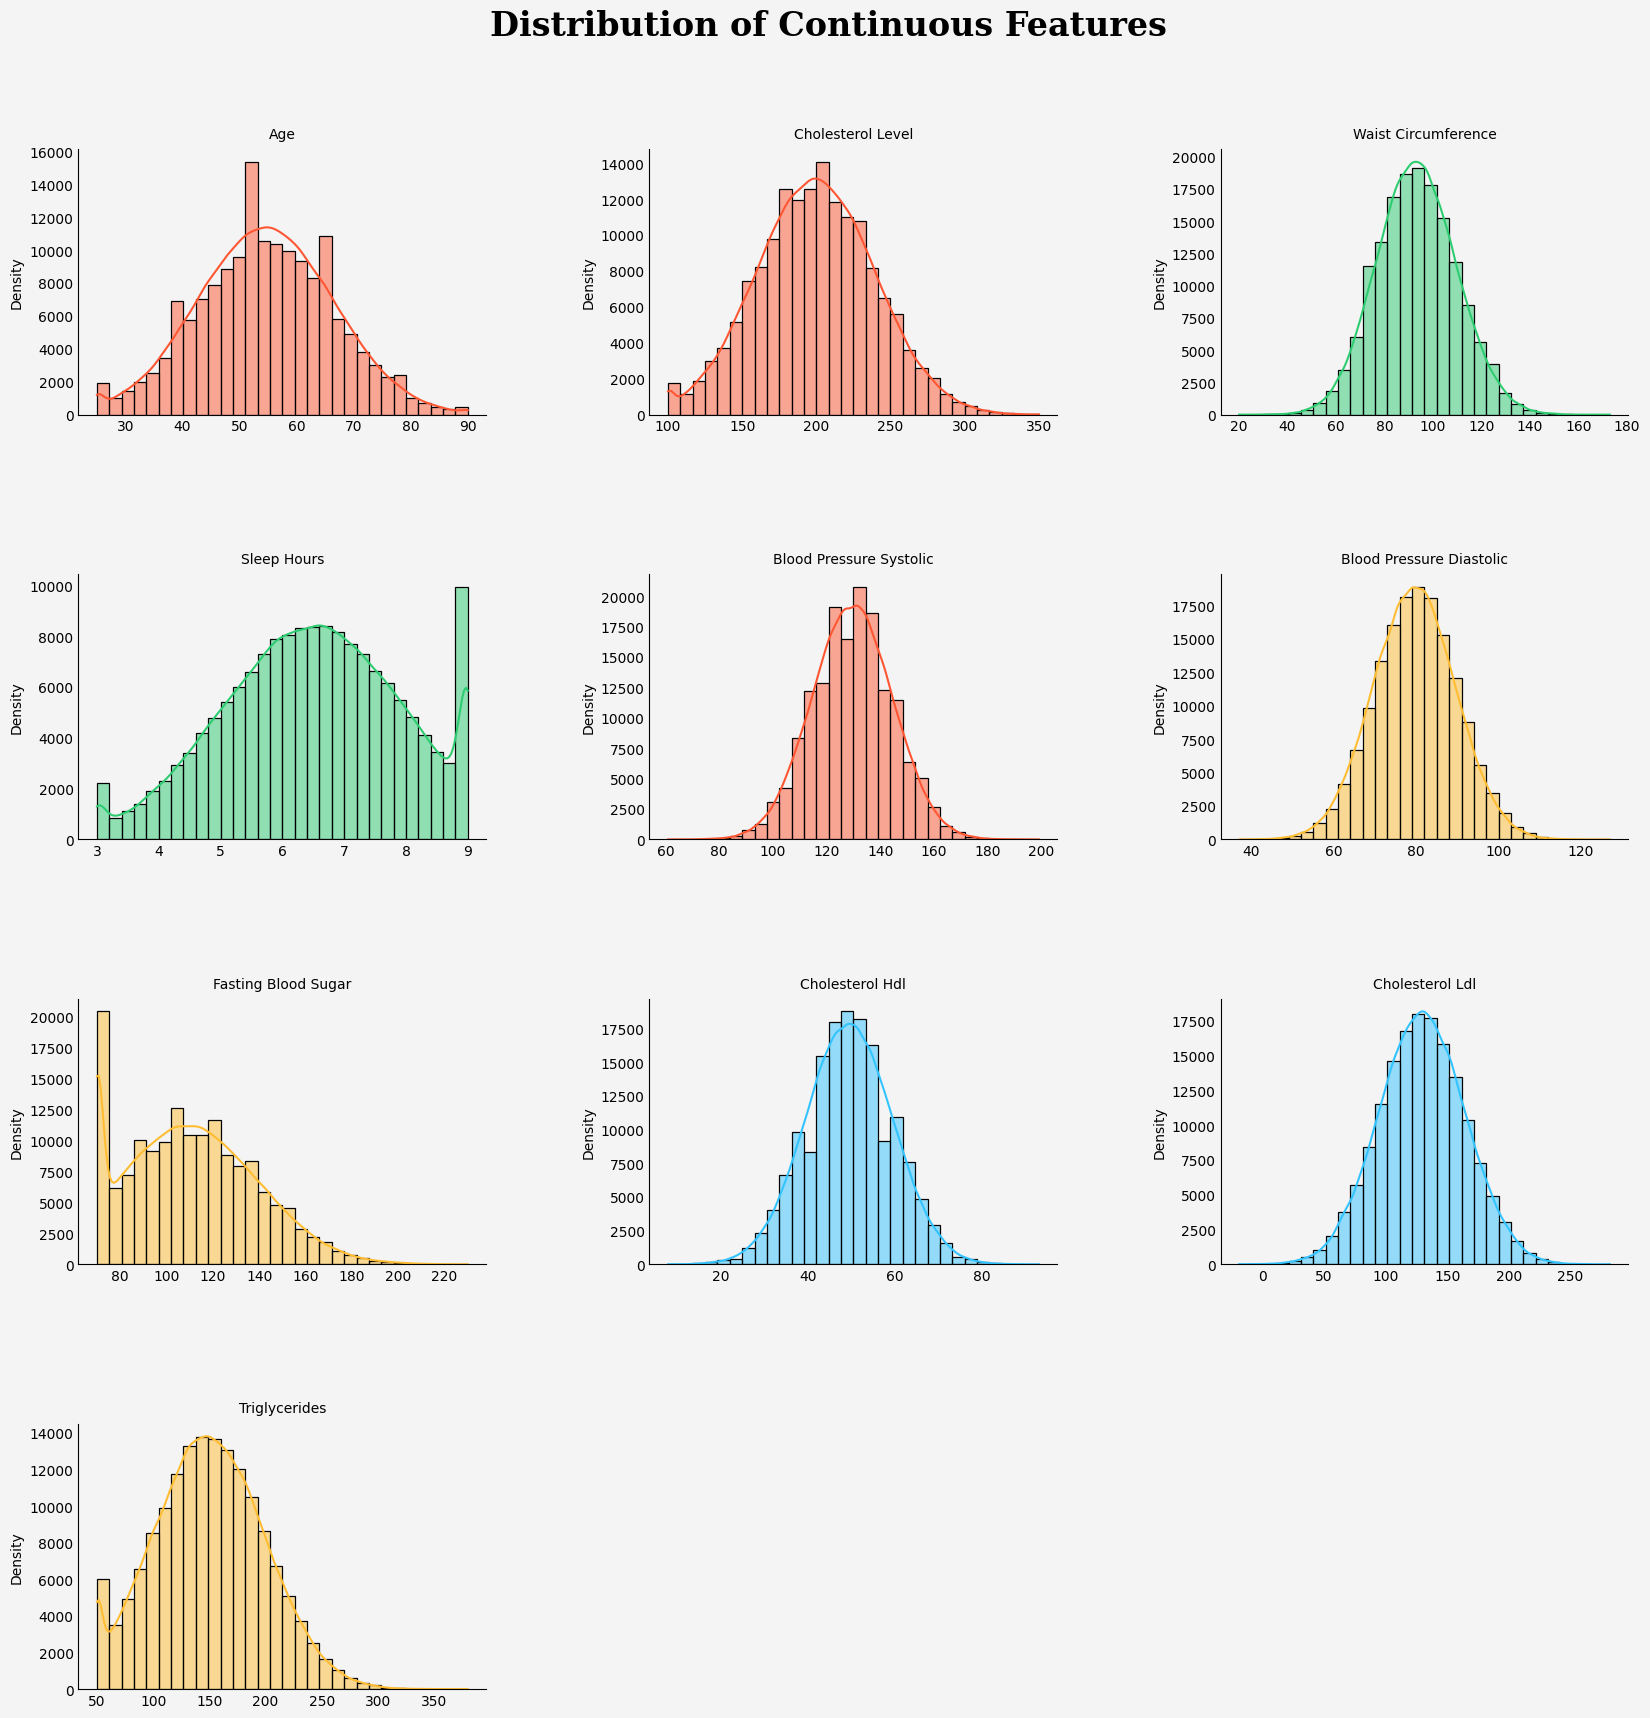

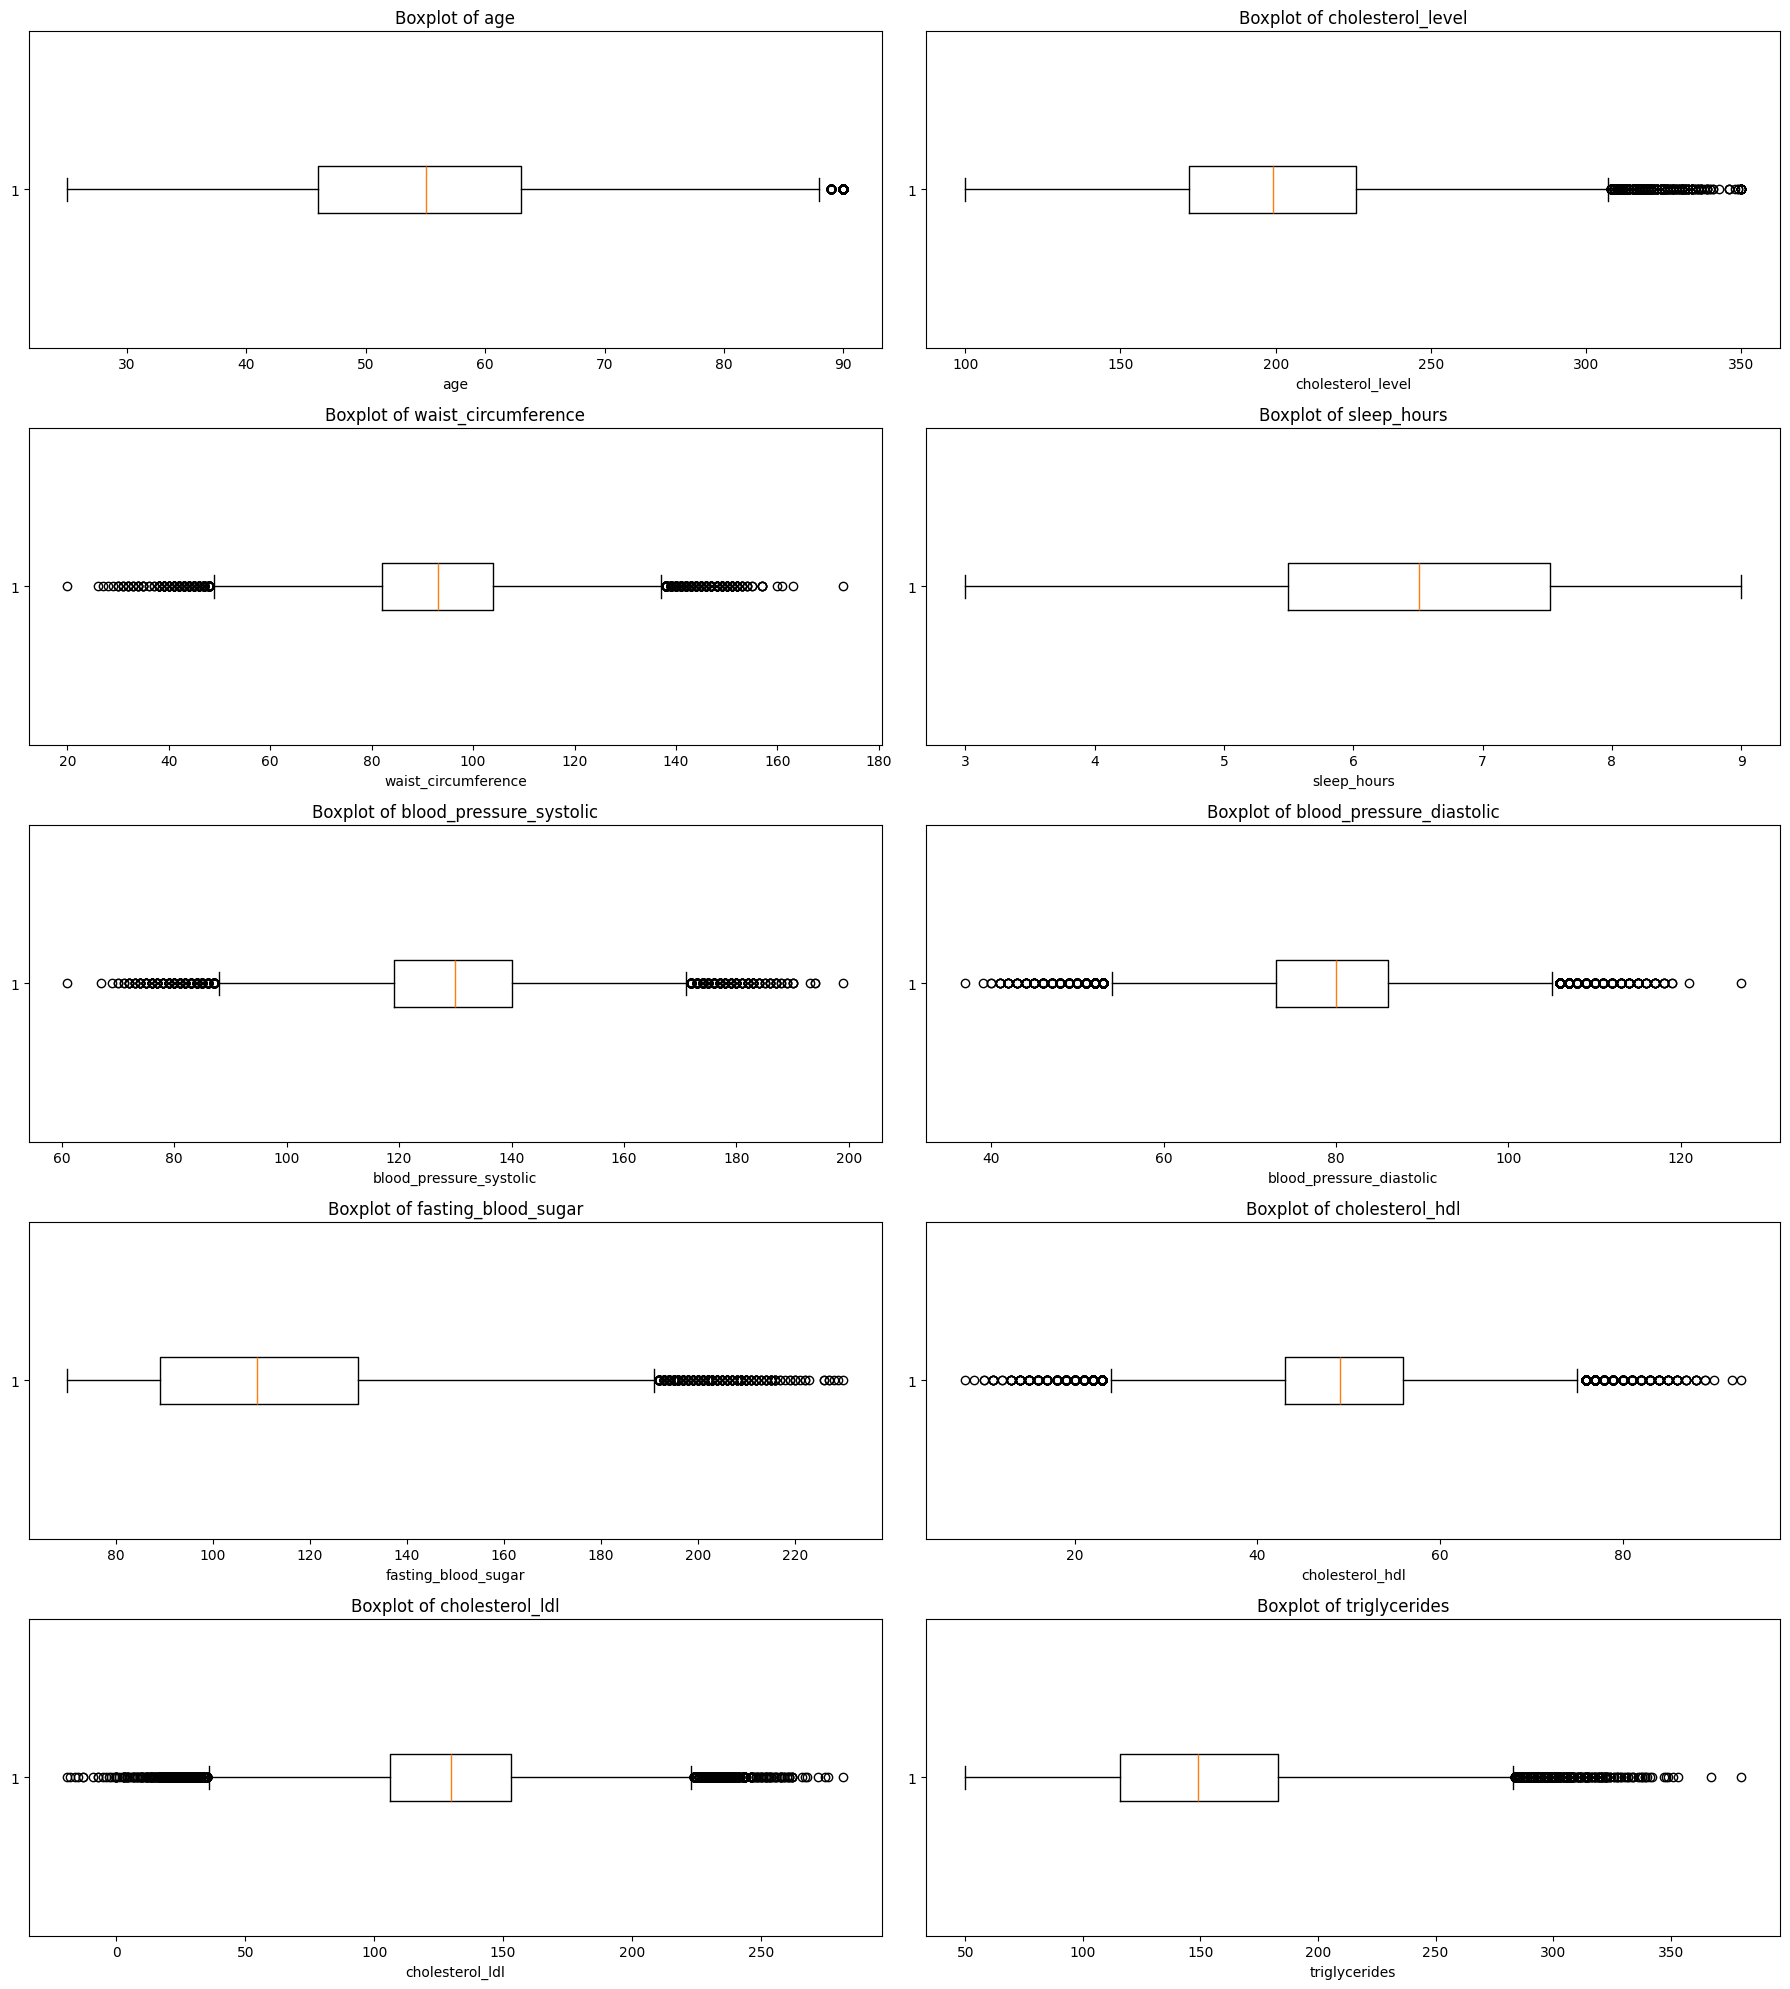

In [5]:
# =====================================================
# 2. DISTRIBUSI VARIABEL NUMERIK
# =====================================================

# List kolom numerik yang relevan
numeric_cols = [
    'age', 'cholesterol_level', 'waist_circumference',
    'sleep_hours', 'blood_pressure_systolic',
    'blood_pressure_diastolic', 'fasting_blood_sugar',
    'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides'
]

# 2.1 Statistik dasar tiap variabel numerik
print("===== Statistical Summary of Numerical Columns =====")
print(df[numeric_cols].describe())

# 2.2 Histogram distribusi setiap variabel numerik
background_color = "#f4f4f4"  
color_palette = ["#ff5733", "#33c4ff", "#ffbd33", "#9b59b6", "#2ecc71"]

fig = plt.figure(figsize=(20, 20))  
gs = fig.add_gridspec(4, 3)  
gs.update(wspace=0.4, hspace=0.6)

axes = [fig.add_subplot(gs[i//3, i%3]) for i in range(len(numeric_cols))]

fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)
    ax.tick_params(axis='both', which='both', length=0)
    for s in ["top","right"]:
        ax.spines[s].set_visible(False)

for ax, feature in zip(axes, numeric_cols):
    sns.histplot(df[feature], ax=ax, kde=True, bins=30, color=np.random.choice(color_palette), edgecolor='black')
    ax.set_title(feature.replace('_', ' ').title(), fontsize=10, pad=8)
    ax.set_xlabel('')
    ax.set_ylabel('Density')

plt.suptitle('Distribution of Continuous Features', 
             fontsize=24, 
             fontweight='bold',
             fontfamily='serif',
             y=0.95)

plt.tight_layout()
plt.show()

# 2.3 Boxplot untuk mendeteksi outliers
plt.figure(figsize=(18, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


3. Distribusi Variabel Kategorikal (Klinis, Gaya Hidup, Sosial)

Tujuan: memahami kategori yang dibutuhkan untuk logika proposisional & probabilitas

Variabel kategorikal:
- gender
- region
- income_level
- hypertension
- diabetes
- cholesterol_level
- obesity
- family_history
- smoking_status
- alcohol_consumption
- physical_activity
- dietary_habits
- stress_level
- EKG_results
- previous_heart_disease
- medication_usage
- participated_in_free_screening

EDA yang dilakukan:
- value_counts()
- bar chart

C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_23064\3812142149.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


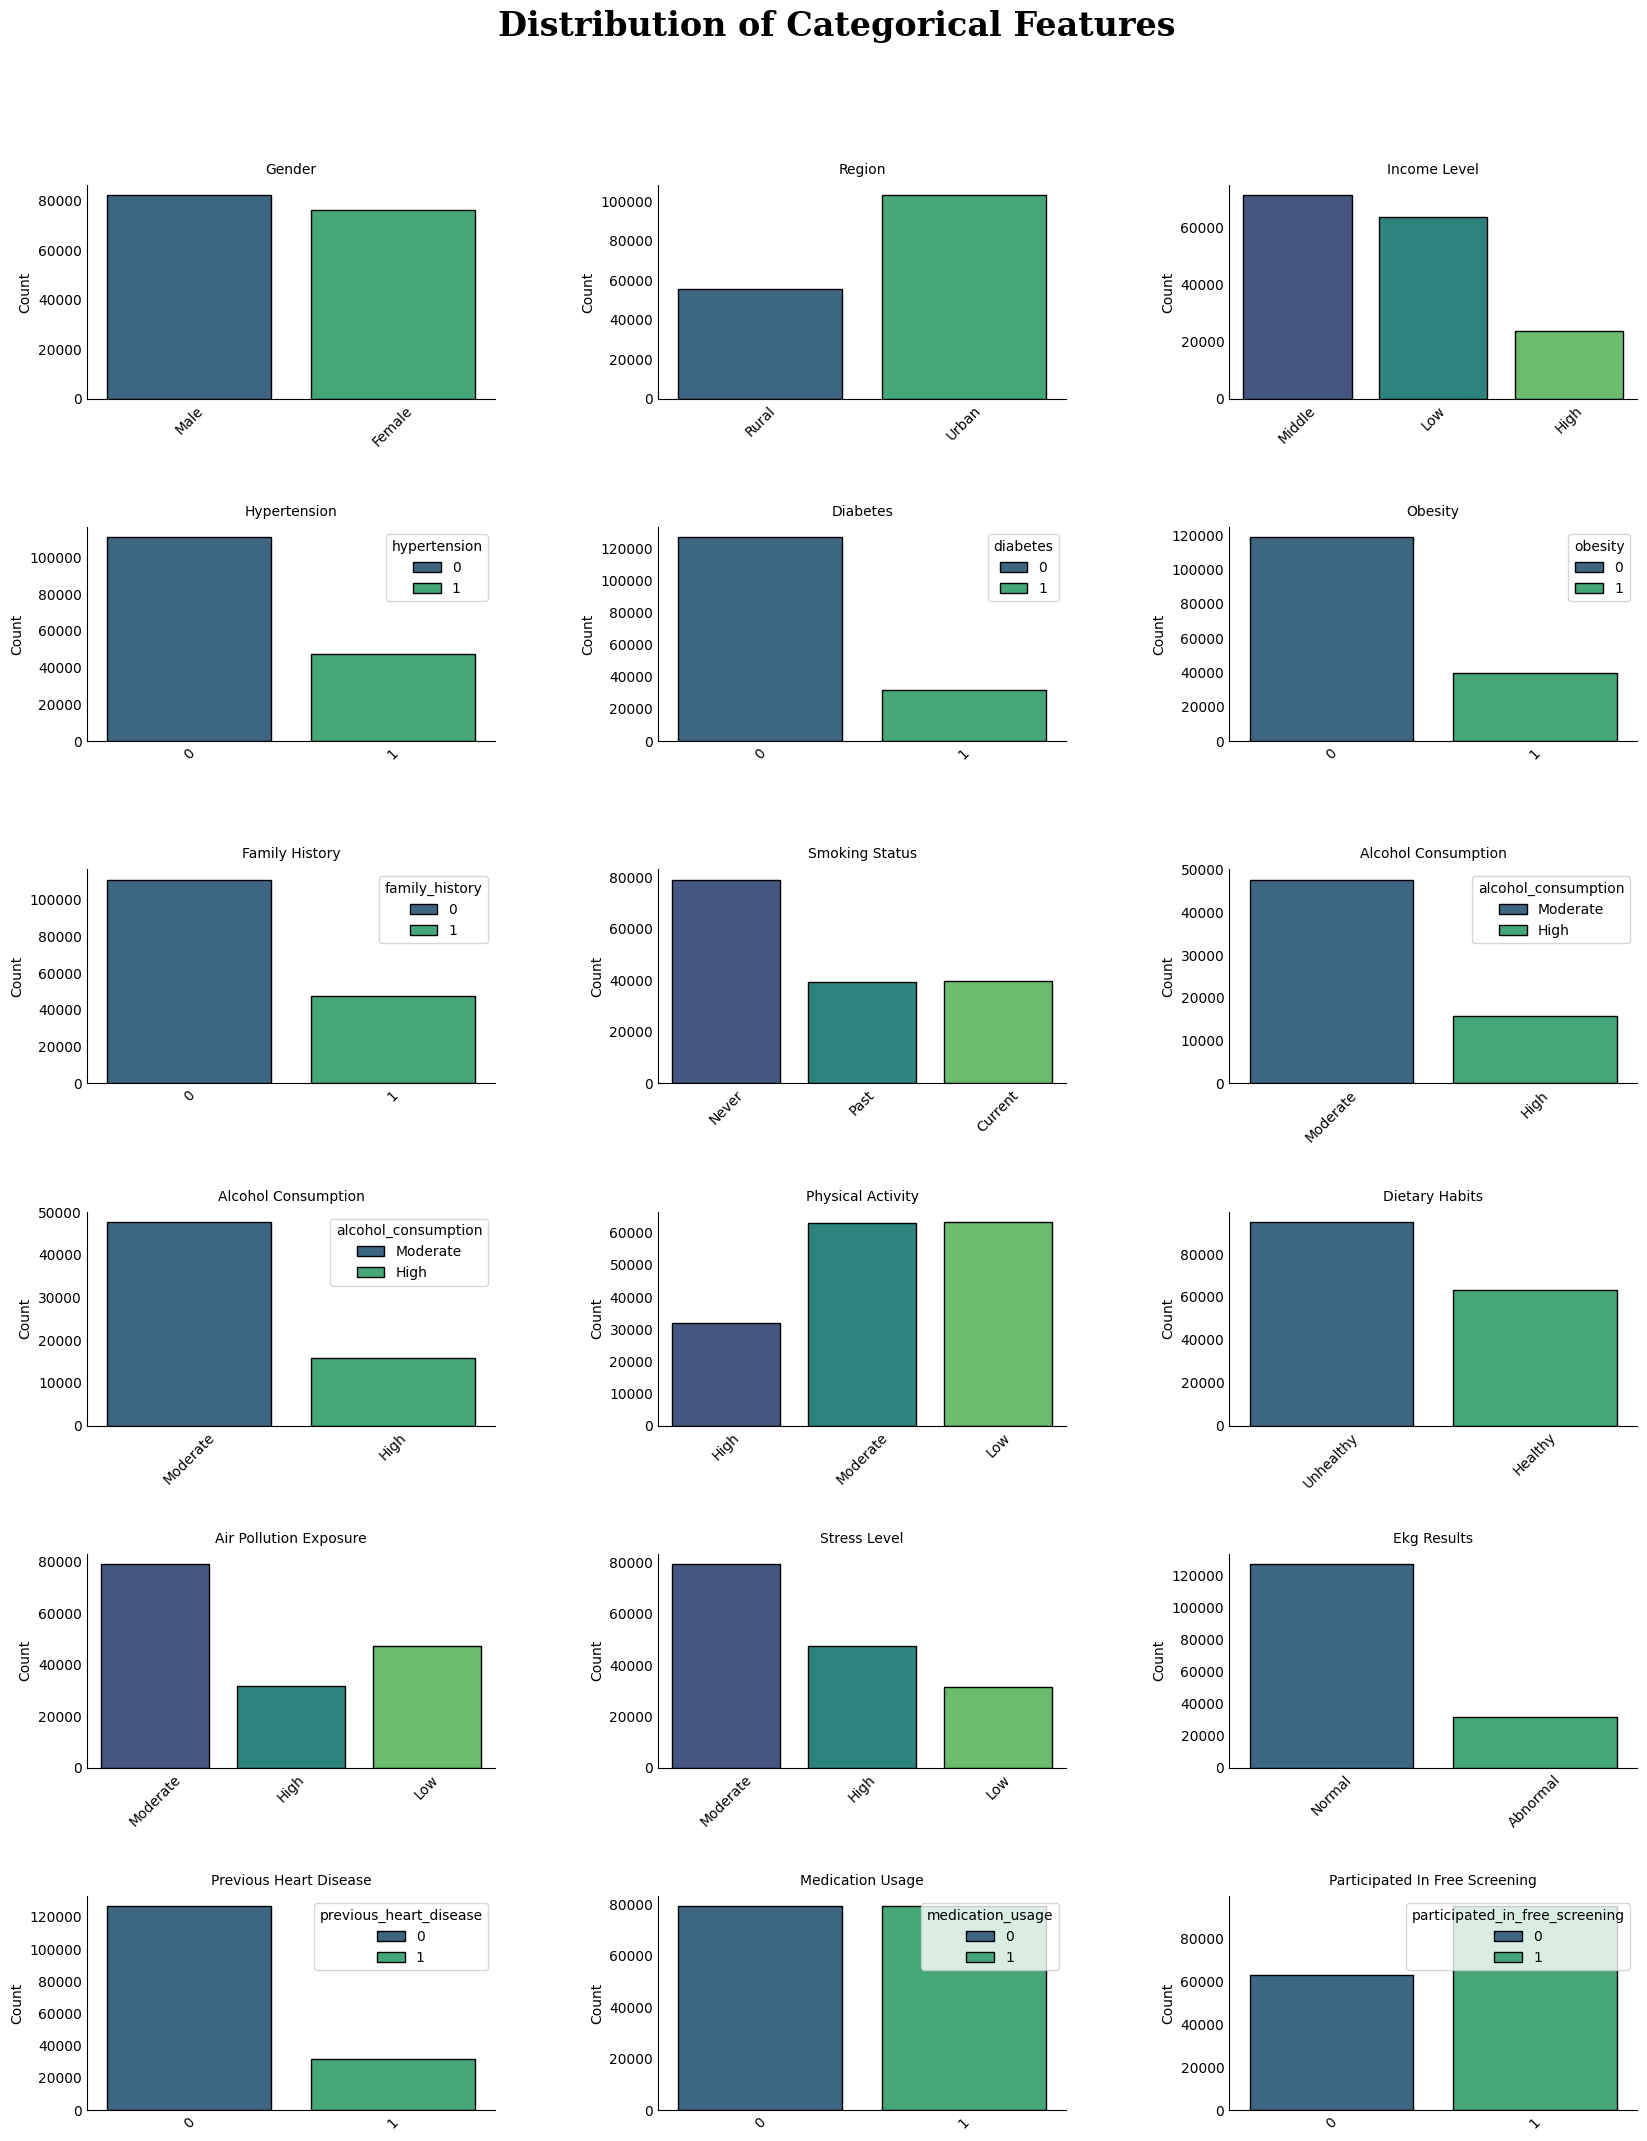

In [8]:
# ============================
# 3. DISTRIBUSI VARIABEL KATEGORIKAL
# ============================
cat_cols = [
    'gender', 'region', 'income_level', 'hypertension', 
    'diabetes', 'obesity', 'family_history', 'smoking_status','alcohol_consumption',
    'alcohol_consumption', 'physical_activity', 'dietary_habits', 
    'air_pollution_exposure', 'stress_level', 'EKG_results', 
    'previous_heart_disease', 'medication_usage', 
    'participated_in_free_screening'
]

# Menghitung jumlah subplot
fig = plt.figure(figsize=(20, 25))  
gs = fig.add_gridspec(6, 3) 
gs.update(wspace=0.4, hspace=0.6)

axes = [fig.add_subplot(gs[i//3, i%3]) for i in range(len(cat_cols))]

background_color = '#FFFFFF' 
color_palette = 'viridis' 
fig.patch.set_facecolor(background_color)

fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)
    ax.tick_params(axis='both', which='both', length=0)
    for s in ["top", "right"]:
        ax.spines[s].set_visible(False)

for ax, feature in zip(axes, cat_cols):
    sns.countplot(data=df, x=feature, ax=ax, palette=color_palette, edgecolor='black', hue=feature)
    ax.set_title(feature.replace('_', ' ').title(), fontsize=10, pad=8)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Distribution of Categorical Features', 
             fontsize=24, 
             fontweight='bold',
             fontfamily='serif',
             y=0.95)

plt.tight_layout()
plt.show()


4. Heart Attack Distribution (Target Variable)

Tujuan: baseline probability & imbalance analysis

EDA yang dilakukan:
- jumlah kasus 0/1
- proporsi heart_attack
- bar chart

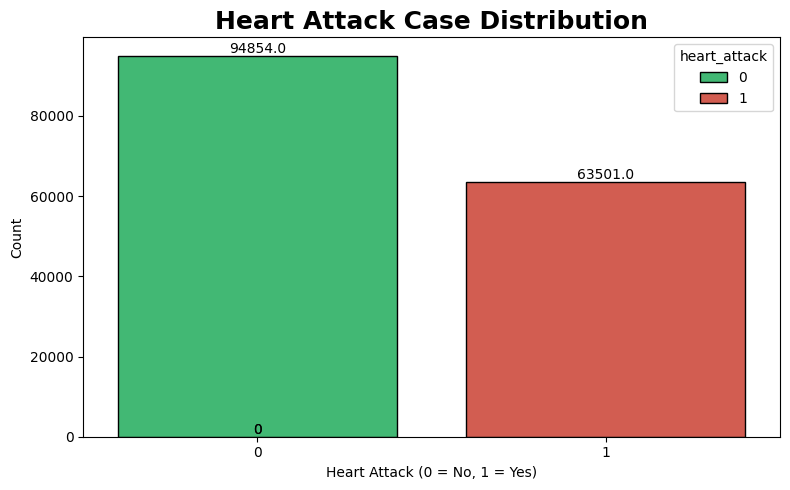

Heart Attack Proportion (%):
heart_attack
0    59.9
1    40.1
Name: proportion, dtype: float64


In [10]:
# ============================================
# 4. HEART ATTACK DISTRIBUTION (TARGET VARIABLE)
# ============================================

plt.figure(figsize=(8, 5))

# Bar plot jumlah kasus
ax = sns.countplot(
    data=df,
    x='heart_attack',
    palette=['#2ecc71', '#e74c3c'],
    edgecolor='black', hue='heart_attack'
)

plt.title("Heart Attack Case Distribution", fontsize=18, fontweight='bold')
plt.xlabel("Heart Attack (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Menampilkan angka di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Menampilkan proporsi
heart_attack_ratio = df['heart_attack'].value_counts(normalize=True) * 100
print("Heart Attack Proportion (%):")
print(heart_attack_ratio.round(2))


5. Relationship: Faktor Risiko → Heart Attack

Tujuan: data dasar untuk logika proposisional & probabilitas diskrit

EDA yang dilakukan:

Crosstab + normalisasi per baris untuk:
- age_group vs heart_attack
- hypertension vs heart_attack
- diabetes vs heart_attack
- cholesterol_level vs heart_attack
- obesity vs heart_attack
- smoking_status vs heart_attack
- alcohol_consumption vs heart_attack
- physical_activity vs heart_attack
- stress_level vs heart_attack
- sleep_hours_group vs heart_attack
- previous_heart_disease vs heart_attack

Ini sangat penting untuk logika proposisional dan probabilitas diskrit.

In [14]:
# =============================================================
# 5. RELATIONSHIP: FAKTOR RISIKO → HEART ATTACK (CROSSTAB)
# =============================================================

# -----------------------------
# Membuat kategori tambahan
# -----------------------------
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 35, 45, 55, 65, 120],
    labels=['<35', '35-45', '46-55', '56-65', '>65']
)

df['sleep_hours_group'] = pd.cut(
    df['sleep_hours'],
    bins=[0, 5, 7, 9, 24],
    labels=['Low (<5)', 'Normal (6-7)', 'Optimal (8-9)', 'High (>9)']
)

# ----------------------------------------------
# Fungsi helper untuk membuat crosstab otomatis
# ----------------------------------------------
def show_crosstab(feature):
    print(f"\n=== Crosstab: {feature} vs Heart Attack ===")
    ct = pd.crosstab(df[feature], df['heart_attack'], normalize='index') * 100
    display(ct.round(2))

# ----------------------------------------------
# Daftar fitur yang dianalisis
# ----------------------------------------------
features_to_check = [
    'age_group',
    'hypertension',
    'diabetes',
    'cholesterol_level',
    'obesity',
    'smoking_status',
    'alcohol_consumption',
    'physical_activity',
    'stress_level',
    'sleep_hours_group',
    'previous_heart_disease'
]

# ----------------------------------------------
# Menampilkan semua crosstab
# ----------------------------------------------
for f in features_to_check:
    show_crosstab(f)



=== Crosstab: age_group vs Heart Attack ===


heart_attack,0,1
age_group,,
<35,64.09,35.91
35-45,64.38,35.62
46-55,64.66,35.34
56-65,57.63,42.37
>65,49.89,50.11



=== Crosstab: hypertension vs Heart Attack ===


heart_attack,0,1
hypertension,,
0,68.52,31.48
1,39.70,60.30



=== Crosstab: diabetes vs Heart Attack ===


heart_attack,0,1
diabetes,,
0,64.66,35.34
1,40.82,59.18



=== Crosstab: cholesterol_level vs Heart Attack ===


heart_attack,0,1
cholesterol_level,,
100,64.79,35.21
101,64.10,35.90
102,68.12,31.88
103,71.43,28.57
104,64.86,35.14
...,...,...
343,0.00,100.00
346,66.67,33.33
348,100.00,0.00



=== Crosstab: obesity vs Heart Attack ===


heart_attack,0,1
obesity,,
0,64.76,35.24
1,45.32,54.68



=== Crosstab: smoking_status vs Heart Attack ===


heart_attack,0,1
smoking_status,,
Current,45.44,54.56
Never,64.72,35.28
Past,64.80,35.20



=== Crosstab: alcohol_consumption vs Heart Attack ===


heart_attack,0,1
alcohol_consumption,,
High,59.22,40.78
Moderate,59.59,40.41



=== Crosstab: physical_activity vs Heart Attack ===


heart_attack,0,1
physical_activity,,
High,59.56,40.44
Low,60.17,39.83
Moderate,59.80,40.20



=== Crosstab: stress_level vs Heart Attack ===


heart_attack,0,1
stress_level,,
High,59.77,40.23
Low,59.56,40.44
Moderate,60.11,39.89



=== Crosstab: sleep_hours_group vs Heart Attack ===


heart_attack,0,1
sleep_hours_group,,
Low (<5),60.37,39.63
Normal (6-7),59.68,40.32
Optimal (8-9),59.98,40.02



=== Crosstab: previous_heart_disease vs Heart Attack ===


heart_attack,0,1
previous_heart_disease,,
0,66.65,33.35
1,33.01,66.99


6. Korelasi Antar Variabel Numerik

Tujuan: menentukan fitur penting untuk decision tree

Variabel numerik dipakai:
- age
- blood pressure
- fasting_blood_sugar
- LDL
- HDL
- triglycerides
- waist circumference
- sleep hours

EDA yang dilakukan:
- korelasi numerik dengan heart_attack
- heatmap kecil (opsional)

Fitur korelasi tertinggi → kandidat decision tree.


=== Korelasi Variabel Numerik dengan Heart Attack ===


heart_attack                1.000
age                         0.106
fasting_blood_sugar         0.070
waist_circumference         0.068
sleep_hours                 0.001
cholesterol_hdl             0.001
cholesterol_ldl             0.001
blood_pressure_diastolic   -0.000
triglycerides              -0.001
blood_pressure_systolic    -0.002
Name: heart_attack, dtype: float64

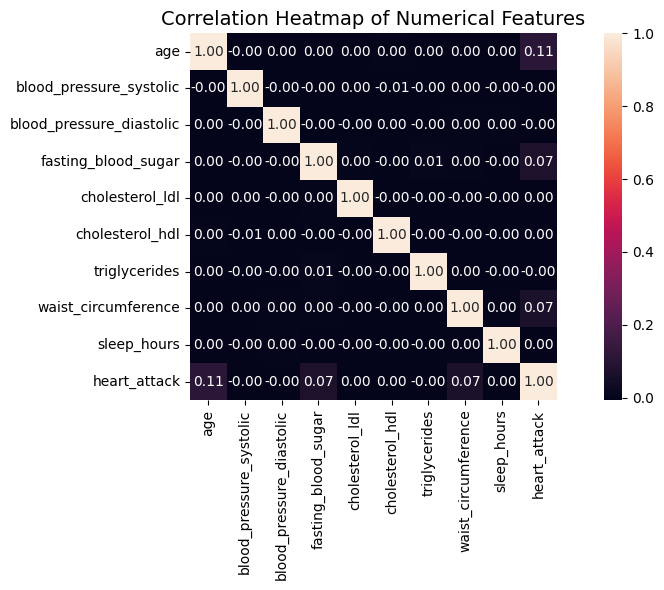

In [16]:
# =============================================================
# 6. KORELASI ANTAR VARIABEL NUMERIK
# Tujuan: Menentukan fitur penting untuk decision tree
# =============================================================

# ----------------------------------------------
# Pilih kolom numerik yang relevan
# ----------------------------------------------
num_cols_corr = [
    'age',
    'blood_pressure_systolic',
    'blood_pressure_diastolic',
    'fasting_blood_sugar',
    'cholesterol_ldl',
    'cholesterol_hdl',
    'triglycerides',
    'waist_circumference',
    'sleep_hours',
    'heart_attack'
]

# ----------------------------------------------
# Hitung korelasi
# ----------------------------------------------
corr_matrix = df[num_cols_corr].corr()

# ----------------------------------------------
# Tampilkan korelasi dengan heart_attack saja
# ----------------------------------------------
print("\n=== Korelasi Variabel Numerik dengan Heart Attack ===")
display(corr_matrix['heart_attack'].sort_values(ascending=False).round(3))

# ----------------------------------------------
# Heatmap kecil (opsional — tapi rapi)
# ----------------------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    square=True,
    cbar=True
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()


7. Threshold Analysis (Untuk Decision Tree & Himpunan Relasi)

Tujuan: mencari batas yang paling membedakan risiko

EDA yang dilakukan:
- groupby umur → rate heart attack
- groupby blood pressure → rate heart attack
- groupby LDL → rate heart attack
- groupby sleep hours → rate heart attack

In [6]:
print(df['sleep_hours'].describe())
print(df['sleep_hours'].value_counts().sort_index())


count    158355.000000
mean          6.480064
std           1.425398
min           3.000000
25%           5.492985
50%           6.507461
75%           7.520640
max           9.000000
Name: sleep_hours, dtype: float64
sleep_hours
3.000000    1576
3.001286       1
3.001743       1
3.001909       1
3.003332       1
            ... 
8.999515       1
8.999595       1
8.999660       1
8.999735       1
9.000000    7580
Name: count, Length: 149201, dtype: int64


In [9]:
print(df['sleep_category'].value_counts(dropna=False))


sleep_category
Low-Normal (5-7)    74566
Optimal (7-9)       51072
Very Low (0-5)      25137
High (>=9)           7580
Name: count, dtype: int64


In [21]:
# =============================================================
# 7. THRESHOLD ANALYSIS
# Tujuan: mencari batas yang paling membedakan risiko
# =============================================================

import pandas as pd

# ---------------------------------------------------
# 1. AGE GROUP THRESHOLD
# ---------------------------------------------------
df['age_group'] = pd.cut(
    df['age'],
    bins=[25, 35, 45, 55, 65, 75, 90],
    labels=["25-35", "36-45", "46-55", "56-65", "66-75", "76-90"]
)

age_threshold = df.groupby('age_group')['heart_attack'].mean() * 100
print("\n=== Heart Attack Rate by Age Group (%) ===")
print(age_threshold.round(2))


# ---------------------------------------------------
# 2. BLOOD PRESSURE THRESHOLD
# ---------------------------------------------------
df['bp_category'] = pd.cut(
    df['blood_pressure_systolic'],
    bins=[80, 120, 140, 160, 200],
    labels=["Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2"]
)

bp_threshold = df.groupby('bp_category')['heart_attack'].mean() * 100
print("\n=== Heart Attack Rate by Blood Pressure Category (%) ===")
print(bp_threshold.round(2))


# ---------------------------------------------------
# 3. LDL THRESHOLD
# ---------------------------------------------------
df['ldl_category'] = pd.cut(
    df['cholesterol_ldl'],
    bins=[0, 100, 130, 160, 200, 300],
    labels=["Optimal", "Near Optimal", "Borderline High", "High", "Very High"]
)

ldl_threshold = df.groupby('ldl_category')['heart_attack'].mean() * 100
print("\n=== Heart Attack Rate by LDL Category (%) ===")
print(ldl_threshold.round(2).to_string())


# ---------------------------------------------------
# 4. SLEEP HOURS THRESHOLD
# ---------------------------------------------------
df['sleep_category'] = pd.cut(
    df['sleep_hours'],
    bins=[0, 5, 7, 9, 12],
    labels=[
        "Very Low (0-5)",
        "Low-Normal (5-7)",
        "Optimal (7-9)",
        "High (>=9)"
    ],
    right=False
)

sleep_threshold = df.groupby('sleep_category')['heart_attack'].mean() * 100
print("\n=== Heart Attack Rate by Sleep Hours Category (%) ===")
print(sleep_threshold.round(2).to_string())




=== Heart Attack Rate by Age Group (%) ===
age_group
25-35    35.71
36-45    35.62
46-55    35.34
56-65    42.37
66-75    50.06
76-90    50.31
Name: heart_attack, dtype: float64

=== Heart Attack Rate by Blood Pressure Category (%) ===
bp_category
Normal                  40.15
Elevated                40.11
Hypertension Stage 1    40.05
Hypertension Stage 2    39.90
Name: heart_attack, dtype: float64

=== Heart Attack Rate by LDL Category (%) ===
ldl_category
Optimal            40.08
Near Optimal       40.05
Borderline High    40.15
High               40.36
Very High          38.26

=== Heart Attack Rate by Sleep Hours Category (%) ===
sleep_category
Very Low (0-5)      39.63
Low-Normal (5-7)    40.32
Optimal (7-9)       40.08
High (>=9)          39.64


C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_7916\1072559095.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_threshold = df.groupby('age_group')['heart_attack'].mean() * 100
C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_7916\1072559095.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bp_threshold = df.groupby('bp_category')['heart_attack'].mean() * 100
C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_7916\1072559095.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

<h5>Penerapan Materi Matematika Diskrit<h5>

1. Logika Proposisional
Materi : IF-THEN, AND-OR, negasi dan implikasi risiko. 
Hasil dari EDA poin 5

Aturan IF THEN seperti 
- IF age_group = "56–65" THEN higher risk
- IF hypertension = Yes AND diabetes = Yes THEN very high risk
- IF LDL = “High” THEN heart_attack probability increases
- IF sleep < 6 THEN risk increases